# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [ ]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [1]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)


In [9]:
df_yellow.head(10)
import random

# Select a random index from the DataFrame
random_index = random.randint(0, len(df_yellow) - 1)

# Retrieve the random data point
random_data_point = df_yellow.iloc[random_index]

# Display the random data point
print(random_data_point)


VendorID                                   2
tpep_pickup_datetime     2022-09-11 14:14:57
tpep_dropoff_datetime    2022-09-11 14:54:45
passenger_count                          1.0
trip_distance                          10.93
RatecodeID                               1.0
store_and_fwd_flag                         N
PULocationID                             138
DOLocationID                             163
payment_type                               1
fare_amount                             37.0
extra                                    0.0
mta_tax                                  0.5
tip_amount                              9.62
tolls_amount                            6.55
improvement_surcharge                    0.3
total_amount                           57.72
congestion_surcharge                     2.5
airport_fee                             1.25
Name: 1081802, dtype: object


In [6]:
df_green.head(5)

dfchrist = df_green[df_green['lpep_pickup_datetime'].dt.strftime('%Y-%m-%d') == "2022-12-25"]

print(dfchrist)

       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
52337         2  2022-12-25 00:02:55   2022-12-25 00:15:58                  N   
52338         2  2022-12-25 00:51:34   2022-12-26 00:00:00                  N   
52339         2  2022-12-25 00:27:02   2022-12-25 00:32:17                  N   
52340         2  2022-12-25 00:39:44   2022-12-25 00:48:51                  N   
52341         2  2022-12-25 00:25:31   2022-12-25 00:33:45                  N   
...         ...                  ...                   ...                ...   
71574         2  2022-12-25 23:00:00   2022-12-25 23:12:00               None   
71575         2  2022-12-25 23:29:00   2022-12-25 23:45:00               None   
71576         2  2022-12-25 23:59:00   2022-12-26 00:15:00               None   
71577         2  2022-12-25 23:30:00   2022-12-25 23:42:00               None   
71578         2  2022-12-25 23:17:00   2022-12-25 23:48:00               None   

       RatecodeID  PULocati

In [ ]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

Tip amount vs fare amount, yellow fare price vs green fare price, zone pickup vs tip amount, distance vs fare amount, passenger count vs fare amount or total amount

Comparing Tip Amount to Fare Amount in a sample of Yellow taxis

In [ ]:
# Write your code
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(1000), 
    x_col = 'tip_amount', 
    y_col = 'fare_amount', 
    title = 'tip_amount vs fare_amount', 
    xlabel = 'tip_amount',
    ylabel = 'fare_amount',
)

Now we will remove the passangers that did not tip

In [ ]:
# Remove rows where tip_amount is equal to 0
df_yellow_filtered = df_yellow.loc[df_yellow['tip_amount'] != 0]

from src.utils import create_scatterplot

create_scatterplot(
    df_yellow_filtered.sample(200), 
    x_col = 'tip_amount', 
    y_col = 'fare_amount', 
    title = 'tip_amount vs fare_amount', 
    xlabel = 'tip_amount',
    ylabel = 'fare_amount',
)


This data shows a general trend that the larger the fare amount is, the bigger the tip will be. This excludes people who did not tip.

Comparing passenger amount to total amount in yellow taxis

In [ ]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(200), 
    x_col = 'passenger_count', 
    y_col = 'total_amount', 
    title = 'passenger_count vs total_amount', 
    xlabel = 'passenger_count',
    ylabel = 'total_amount',
)

As seen above, there is no relation to Passenger count and total amount. No yellow taxi had a fee for passenger amount. 

Average tip amount in green taxis vs yellow taxis

In [ ]:
print("Average tip of yellow taxi rider:", df_yellow['tip_amount'].mean())
print("Average tip of green taxi rider:", df_green['tip_amount'].mean())

The average tip between the two types of taxis is roughly a $5 difference. We found this to be surprising so we decided to look at the amount of rides the green taxis get vs the yellow taxis and to see if that might make a difference.

In [ ]:
# looking at the amount of fares difference in yellow vs green taxis
print(df_yellow.shape[0])
print(df_green.shape[0])

taxi_diff = df_yellow.shape[0] - df_green.shape[0]

print(taxi_diff)

There are 38,815,696 more yellow taxi rides then green taxi rides in the year 2022.

In [ ]:
# looking at the average distance traveled between green and yellow taxis
print("Average distance of yellow taxi rider:", df_yellow['trip_distance'].mean())
print("Average distance of green taxi rider:", df_green['trip_distance'].mean())

This is a really interesting difference we found. The average distance the taxis travel are completely different. We may look into this later to see why there is such a big difference. 

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [ ]:
df_zones.head(5)

In [ ]:
# Write your code

### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

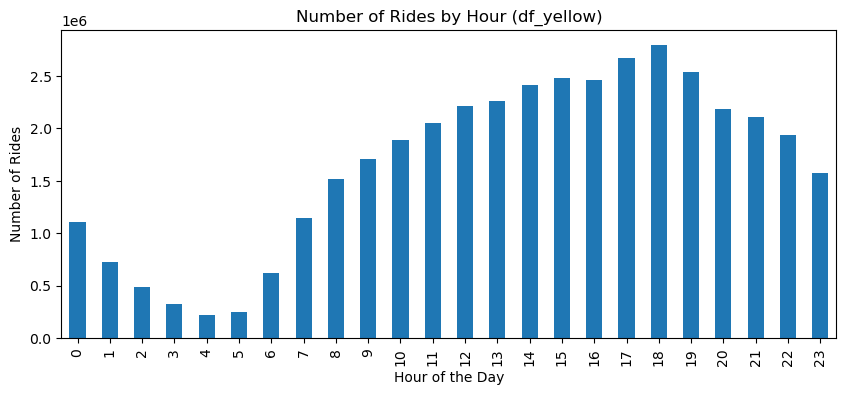

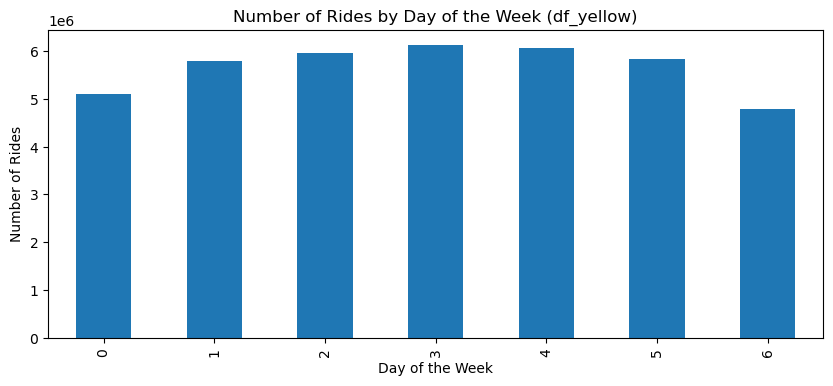

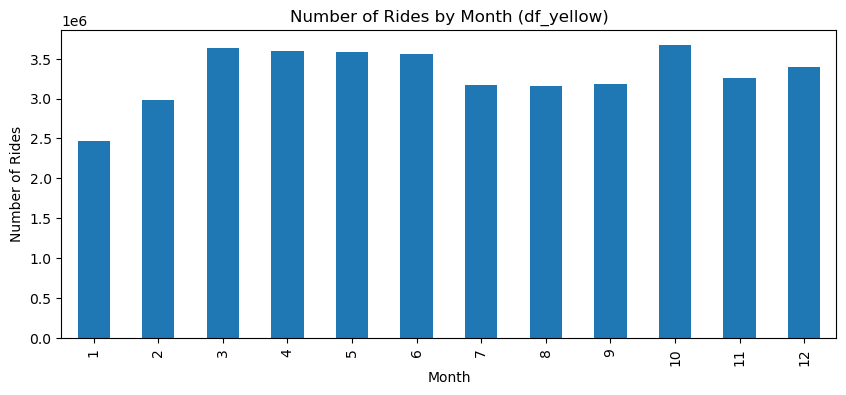

In [2]:
# Write your code
import pandas as pd
import matplotlib.pyplot as plt

# Analyze temporal patterns for df_yellow
# Extract relevant datetime information
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['hour'] = df_yellow['tpep_pickup_datetime'].dt.hour
df_yellow['day_of_week'] = df_yellow['tpep_pickup_datetime'].dt.dayofweek
df_yellow['month'] = df_yellow['tpep_pickup_datetime'].dt.month


# Number of rides by time of day
rides_by_hour_yellow = df_yellow.groupby('hour').size()

# Number of rides by day of the week
rides_by_day_yellow = df_yellow.groupby('day_of_week').size()

# Number of rides by month
rides_by_month_yellow = df_yellow.groupby('month').size()

# Plotting the temporal patterns for df_yellow
fig1, ax1 = plt.subplots(figsize=(10, 4))
rides_by_hour_yellow.plot(kind='bar', ax=ax1)
ax1.set_title('Number of Rides by Hour (df_yellow)')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Number of Rides')

fig2, ax2 = plt.subplots(figsize=(10, 4))
rides_by_day_yellow.plot(kind='bar', ax=ax2)
ax2.set_title('Number of Rides by Day of the Week (df_yellow)')
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Number of Rides')

fig3, ax3 = plt.subplots(figsize=(10, 4))
rides_by_month_yellow.plot(kind='bar', ax=ax3)
ax3.set_title('Number of Rides by Month (df_yellow)')
ax3.set_xlabel('Month')
ax3.set_ylabel('Number of Rides')

# Analyze relationship with other variables (e.g., trip distance and fare)
# Scatter plot: Trip distance vs. Hour of pickup


# Rides by month vs Fare amount


# Show the plots
plt.subplots_adjust(hspace=0.5, wspace=1.3)
plt.show()


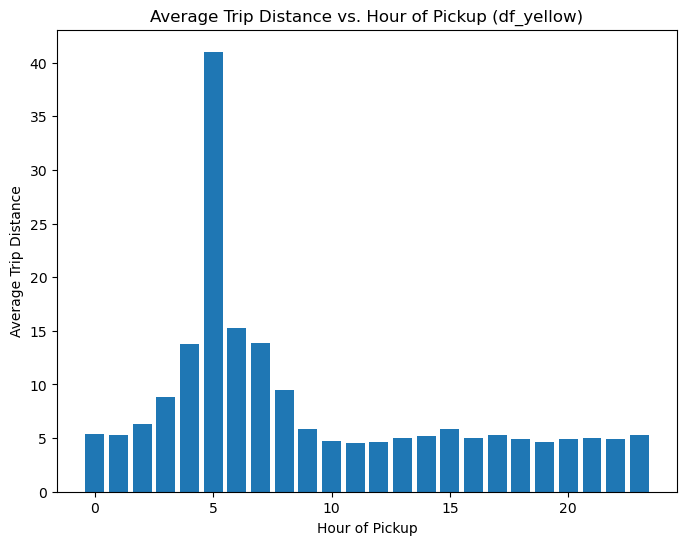

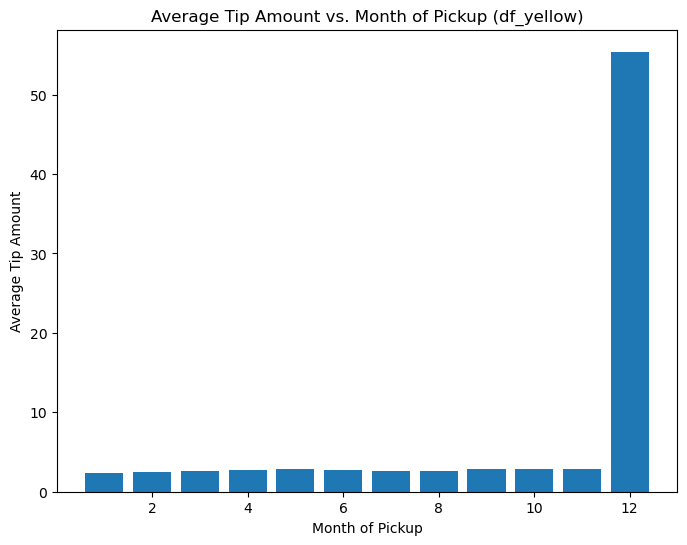

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Analyze temporal patterns for df_yellow
# Extract relevant datetime information
df_yellow['tpep_pickup_datetime'] = pd.to_datetime(df_yellow['tpep_pickup_datetime'])
df_yellow['hour'] = df_yellow['tpep_pickup_datetime'].dt.hour
df_yellow['day_of_week'] = df_yellow['tpep_pickup_datetime'].dt.dayofweek
df_yellow['month'] = df_yellow['tpep_pickup_datetime'].dt.month


# Number of rides by time of day
rides_by_hour_yellow = df_yellow.groupby('hour').size()

# Number of rides by day of the week
rides_by_day_yellow = df_yellow.groupby('day_of_week').size()

# Number of rides by month
rides_by_month_yellow = df_yellow.groupby('month').size()

avg_dis_by_hour = df_yellow.groupby('hour')['trip_distance'].mean()

avg_tip_by_month = df_yellow.groupby('month')['tip_amount'].mean()


# Analyze relationship with other variables (e.g., trip distance and fare)
# Scatter plot: Trip distance vs. Hour of pickup
plt.figure(figsize=(8, 6))
plt.bar(avg_dis_by_hour.index, avg_dis_by_hour.values)
plt.xlabel('Hour of Pickup')
plt.ylabel('Average Trip Distance')
plt.title('Average Trip Distance vs. Hour of Pickup (df_yellow)')

# Rides by month vs Tip amount
plt.figure(figsize=(8, 6))
plt.bar(avg_tip_by_month.index, avg_tip_by_month.values)
plt.xlabel('Month of Pickup')
plt.ylabel('Average Tip Amount')
plt.title('Average Tip Amount vs. Month of Pickup (df_yellow)')

# Show the plots
plt.subplots_adjust(hspace=0.5, wspace=1.3)
plt.show()


Now looking at green taxis 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Analyze temporal patterns for df_green
# Extract relevant datetime information
df_green['lpep_pickup_datetime'] = pd.to_datetime(df_green['lpep_pickup_datetime'])
df_green['hour'] = df_green['lpep_pickup_datetime'].dt.hour
df_green['day_of_week'] = df_green['lpep_pickup_datetime'].dt.dayofweek
df_green['month'] = df_green['lpep_pickup_datetime'].dt.month

# Number of rides by time of day
rides_by_hour_green = df_green.groupby('hour').size()

# Number of rides by day of the week
rides_by_day_green = df_green.groupby('day_of_week').size()

# Number of rides by month
rides_by_month_green = df_green.groupby('month').size()

# Plotting the temporal patterns for df_yellow
fig1, ax1 = plt.subplots(figsize=(10, 4))
rides_by_hour_green.plot(kind='bar', ax=ax1)
ax1.set_title('Number of Rides by Hour (df_green)')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Number of Rides')

fig2, ax2 = plt.subplots(figsize=(10, 4))
rides_by_day_green.plot(kind='bar', ax=ax2)
ax2.set_title('Number of Rides by Day of the Week (df_green)')
ax2.set_xlabel('Day of the Week')
ax2.set_ylabel('Number of Rides')

fig3, ax3 = plt.subplots(figsize=(10, 4))
rides_by_month_green.plot(kind='bar', ax=ax3)
ax3.set_title('Number of Rides by Month (df_green)')
ax3.set_xlabel('Month')
ax3.set_ylabel('Number of Rides')

# Analyze relationship with other variables (e.g., trip distance and fare)
# Scatter plot: Trip distance vs. Hour of pickup
plt.figure(figsize=(8, 6))
plt.scatter(df_green['hour'], df_green['trip_distance'])
plt.xlabel('Hour of Pickup')
plt.ylabel('Trip Distance')
plt.title('Trip Distance vs. Hour of Pickup (df_green)')

# Show the plots
plt.subplots_adjust(hspace=0.5, wspace=1.3)
plt.show()

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [ ]:
# Write your code

### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.

Things to consider: Covid ups and downs, Uber/Lyft, Random drop offs in the ocean effecting data? Some negative fare amounts